In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
states = pd.read_csv(r'data\grid_map_rus - blank.csv')
states = states[['subj_full','subj_rus','subj_eng','col','row']]
rates = pd.read_csv(r'data\upper_secondary_transition_by_Russia_regions_eng.csv')
rates_country = rates[rates['type']=='Country'].sort_values(by='year')
rates_city = rates[rates['type']=='City'].sort_values(by='year')

C:\Users\yuliy\AppData\Local\Temp\ipykernel_21040\2678571872.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('coolwarm', 10)


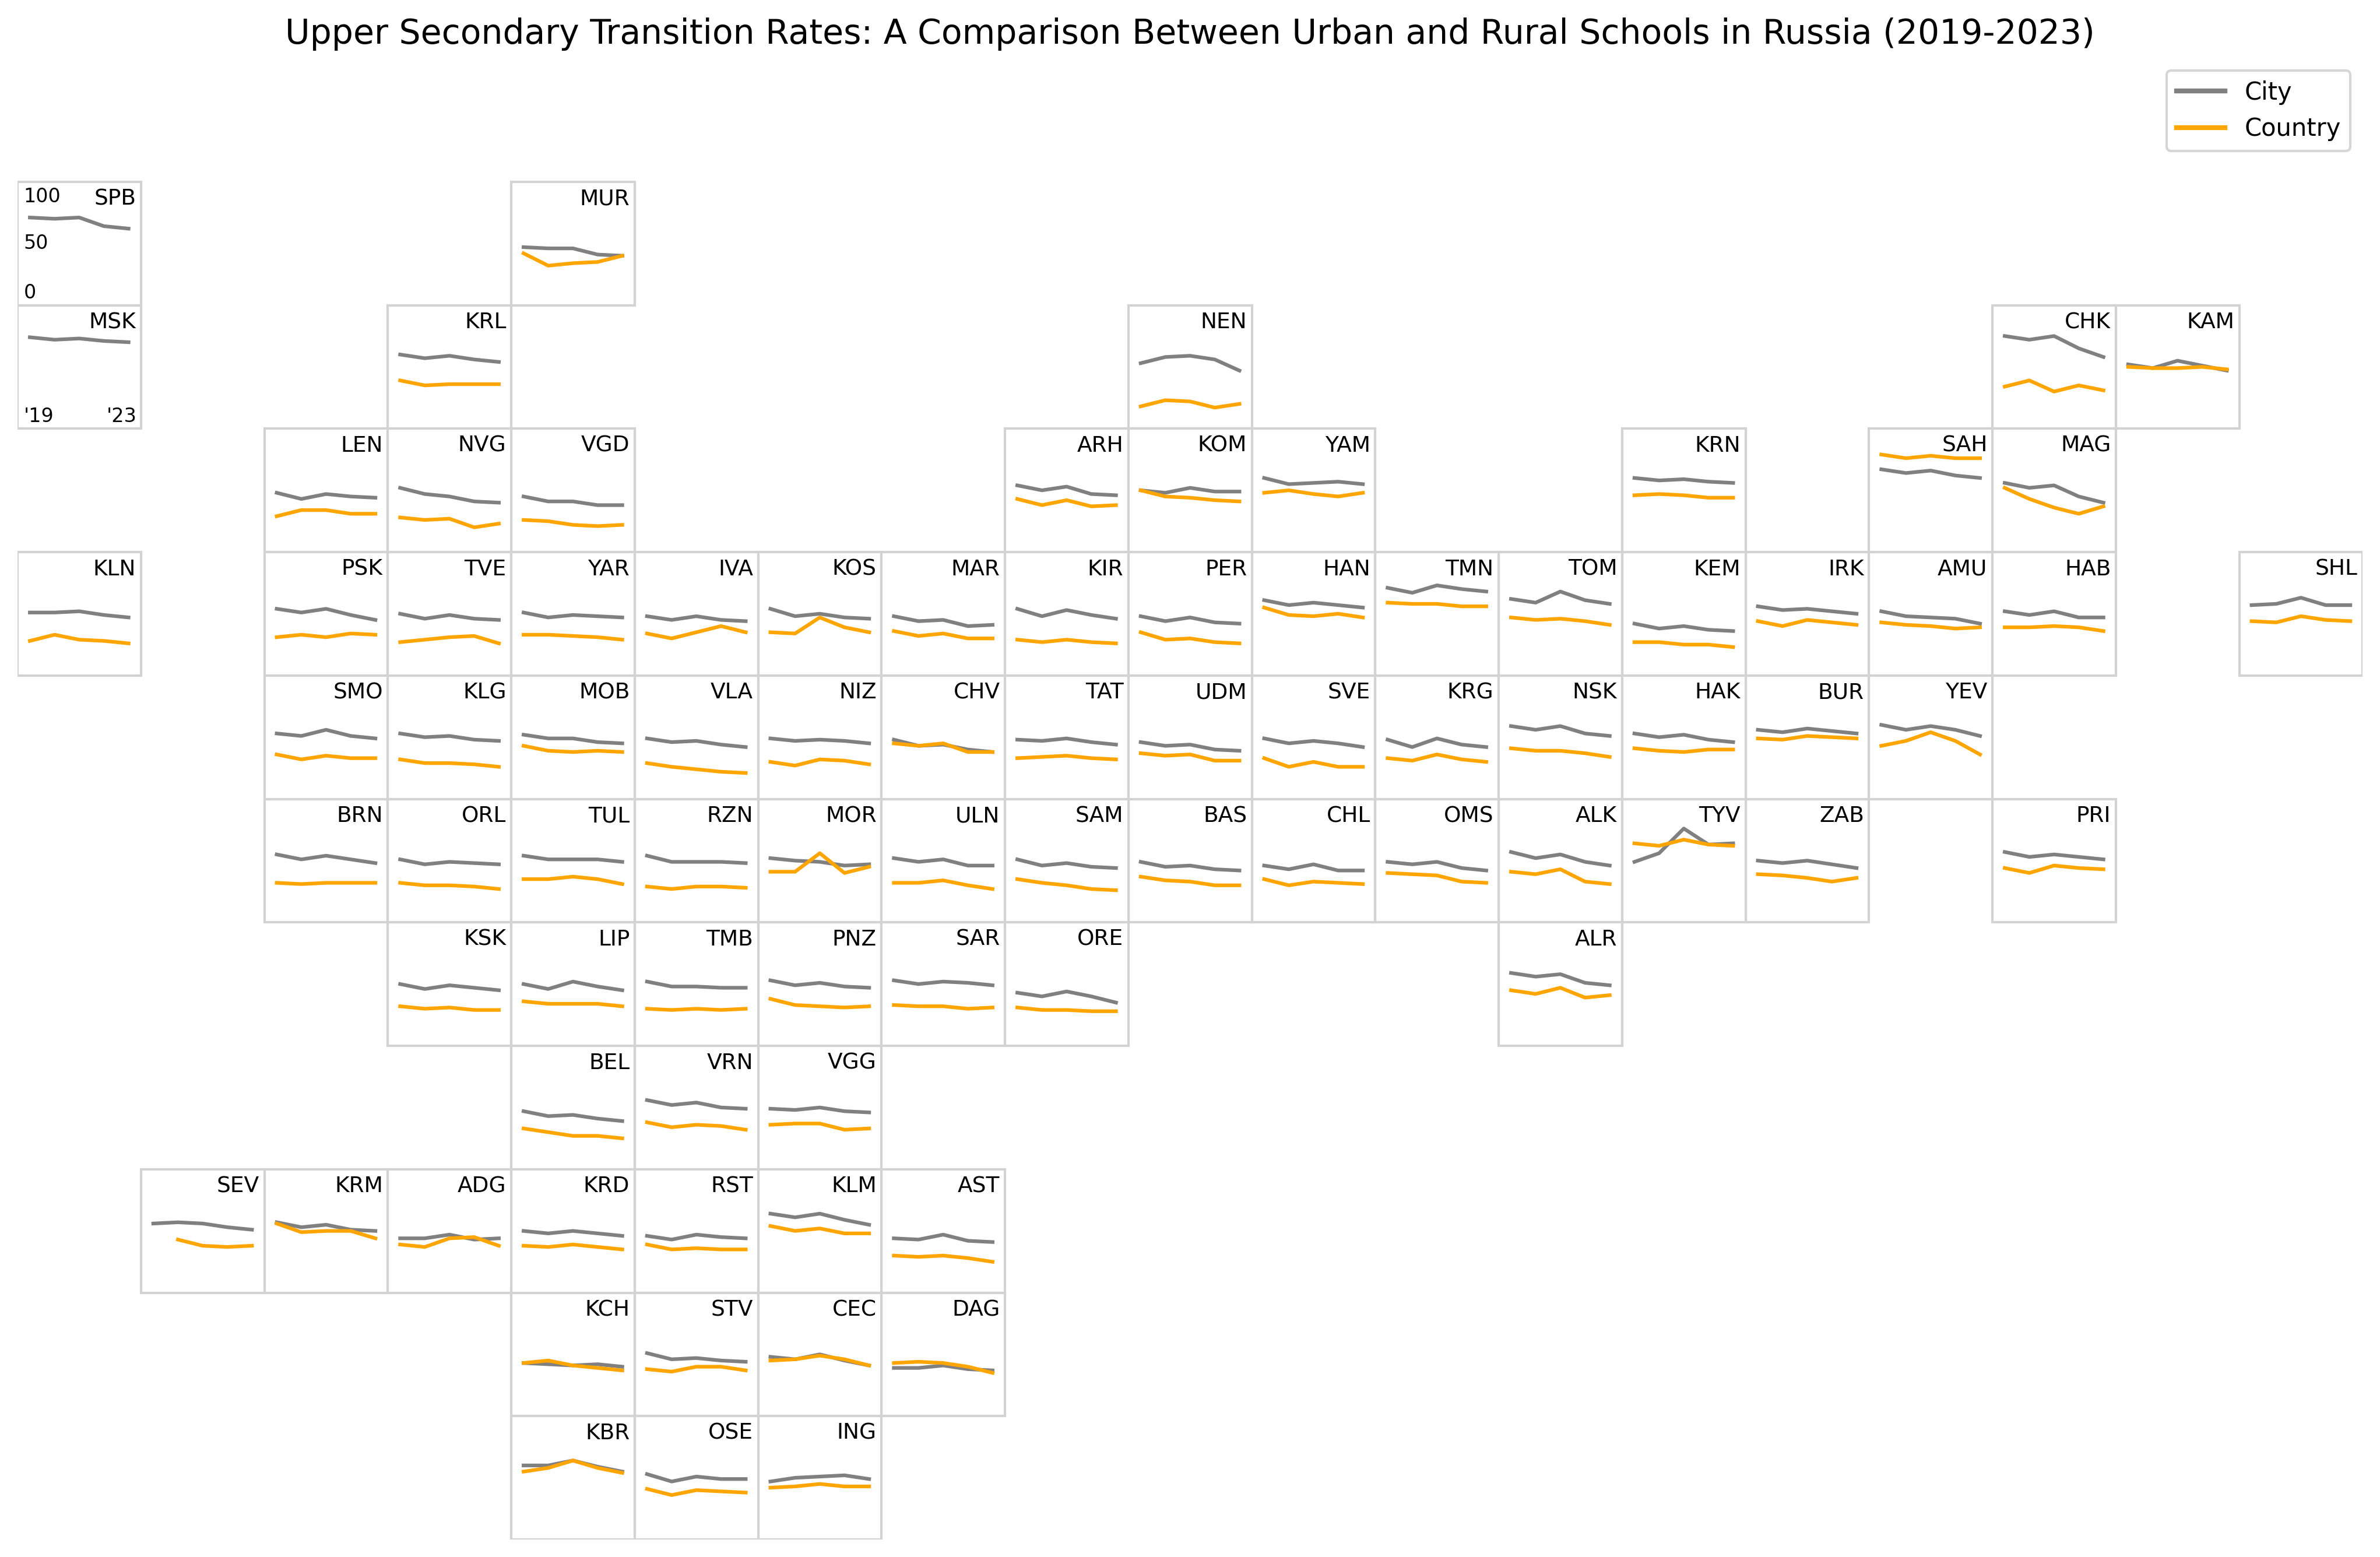

In [4]:
fig, axs = plt.subplots(1, figsize=(19, 11), dpi=300)
plt.xlim(0, 19)
plt.ylim(11,-1)
plt.axis('off')
axs.set_aspect('equal')
plt.title("Upper Secondary Transition Rates: A Comparison Between Urban and Rural Schools in Russia (2019-2023)", fontsize=14)
colors = cm.get_cmap('coolwarm', 10)
for _, state in states.iterrows():
    row = state.row
    column = state.col
    
    # Draw the rectangle for the tile grid.
    box = patches.Rectangle((column, row), 1, 1, linewidth=1, edgecolor='lightgrey', facecolor='white')
    axs.add_patch(box)
    
    # Add region abbreviation text to the box
    plt.text(column +0.96, row + 0.14, 
             state.subj_eng, 
             horizontalalignment='right', 
             verticalalignment='center', 
             color='black',
            fontsize=9)
# The two main cities in Russia are shown in the upper left corner, and we add axes to them to illustrate proportions. 
# This is convenient as they do not have rural territories, resulting in their patches appearing emptier.
    if state.subj_eng in(['MSK']):
        plt.text(column + 0.05, row + 0.9, 
                "'19", 
                horizontalalignment='left', 
                verticalalignment='center', 
                color='black',
                fontsize=8)
        plt.text(column + 0.72, row + 0.9, 
                "'23", 
                horizontalalignment='left', 
                verticalalignment='center', 
                color='black',
                fontsize=8)
    if state.subj_eng in(['SPB']):
        plt.text(column + 0.05, row + 0.9, 
                "0", 
                horizontalalignment='left', 
                verticalalignment='center', 
                color='black',
                fontsize=8)
        plt.text(column + 0.05, row + 0.5, 
                "50", 
                horizontalalignment='left', 
                verticalalignment='center', 
                color='black',
                fontsize=8)
        plt.text(column + 0.05, row + 0.12, 
                "100", 
                horizontalalignment='left', 
                verticalalignment='center', 
                color='black',
                fontsize=8)
    #Add chart inside every rectangle patch. Chart coordinates must be in 0..1 interval.
    x1 = np.array([0.1, 0.3, 0.5,0.7,0.9])  # Here, the values are entered manually. If we count, it's simply the number of x plotted on a grid from 0 to 1 within each patch to make it look nice.
    #In every box, the grid starts from the upper left corner, so the percentage needs to be subtracted from 1. In this example, this has been done in advance in the dataset.
    y1 = np.array(rates_city[rates_city['region_name']==state.subj_full]['10th_share_zero'])    # Example y values based on state position
    x2 = np.array([0.1, 0.3, 0.5,0.7,0.9])
    y2 = np.array(rates_country[rates_country['region_name']==state.subj_full]['10th_share_zero']) 
    # Plot line chart in the corresponding box
    axs.plot(x1 + column, y1 + row, color='grey', linewidth=1.5)  # Adjust position to fit in the box
    axs.plot(x2 + column, y2 + row, color='orange', linewidth=1.5)

# Show the plot
handles = [
    plt.Line2D([0], [0], color='grey', lw=2),
    plt.Line2D([0], [0], color='orange', lw=2)
]
labels = ['City', 'Country']
plt.legend(handles, labels, loc='best')
plt.savefig('Upper_Secondary_Transition_Rates.png', bbox_inches='tight', dpi=300)
# plt.show()